## Генерируем train выборки
В данном ноутбуке класстеризуем изображения представленна в последней своей версии. Код класстеризации написан на matlab.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
## csv файл с инофрмацией по каждому изображению
train_data = pd.read_csv('F:\\Downloads\\all\\data_trains\\train_fin.csv')

In [3]:
"""
Информация представленна в виде:

SumSq - суммарная площадь кораблей
MaxSq - максимальная площадь корабля на фото
MinSq - минимальная площадь корабля на фото 
Count - количество кораблей на фото 
CA - средняя освещенность
CV - среднее отклонение от средней освещенности
sBin - площадь после бинаризации по порогу в 30 пикселей
sBin50 - площадь после бинаризации по порогу в 50 пикселей
CAblur - средняя освещенность после блюра
CVblur - среднее отклоненение после блюра
Cor(RG) - кореляция R и G каналов изображений 
Cor(RB) - кореляция R и B каналов изображений
class - класс изображения (1 - mono, 2 - simple, 3 - motley, 4 - cloud, 5 - view)
ImageId - имя фото 

"""

train_data.head()

,Unnamed: 0,SumSq,MaxSq,MinSq,Count,CA,CV,sBin,sBin50,CAblur,CVblur,Cor(RG),Cor(RB),class,ImageId
0,0,0.0,0.0,0.0,0.0,139.990,3.6789,0.000000,0.000000,139.970,3.1316,14.9980,19.258,1.0,0001124c7.jpg
1,1,3388.0,3388.0,3388.0,1.0,82.584,5.7161,0.002942,0.000902,82.582,1.5516,14.6580,36.020,1.0,000155de5.jpg
2,2,1460.0,7.0,648.0,5.0,111.080,23.9150,0.297230,0.060633,111.040,22.2830,7.3184,27.043,4.0,000194a2d.jpg
3,3,0.0,0.0,0.0,0.0,135.960,5.6973,0.000000,0.000000,135.970,5.0858,33.1170,35.736,1.0,0001b1832.jpg
4,4,1176.0,18.0,424.0,9.0,100.400,29.3370,0.432190,0.113820,100.470,17.5960,11.0410,30.274,5.0,00021ddc3.jpg


## Dataset под задачу simple НС 1
Датасет представляет из себя комбинацию кораблей из класса simple по порогу максимальной и минимальной площади кораблей

In [25]:
mono = train_data[train_data['class'] == 1.0]
mono = mono[mono['Count'] > 0] 
mono = mono[mono['MaxSq'] < 2000] 
mono = mono[mono['MinSq'] > 60] 

In [26]:
mono.shape

(9952, 15)

In [23]:
small_simple = train_data[train_data['class'] == 2.0]
small_simple = small_simple[small_simple['Count'] > 1]
small_simple = small_simple[small_simple['MaxSq'] < 2000]
small_simple = small_simple[small_simple['MinSq'] > 60]

In [24]:
small_simple.shape

(6161, 15)

In [13]:
SMALL_SHIPS = pd.concat([mono, small_simple])
SMALL_SHIPS.shape

(21935, 15)

In [6]:
simple = train_data[train_data['class'] == 2.0]
simple = simple[simple['SumSq'] > 200]
simple = simple[simple['SumSq'] < 16000]

In [7]:
simple.shape

(14552, 15)

In [81]:
SIMPLE_TRAIN = pd.concat([simple])

## Dataset под задачу port НС 2

In [11]:
port = train_data[train_data['class'] == 4.0]
port = port[port['Count'] > 0]

In [12]:
port.shape

(3313, 15)

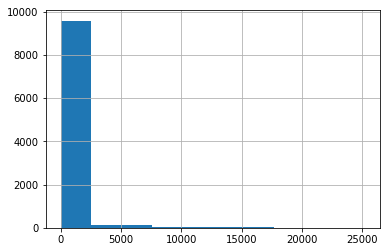

In [13]:
view_ship = train_data[train_data['class'] == 5.0]

view_ship['MaxSq'].hist()

In [14]:
view_ship = view_ship[view_ship['Count'] > 0]

In [40]:
view_ship.shape

(2621, 15)

In [130]:
view = train_data[train_data['class'] == 5.0]
view = view[view['Count'] == 0]

In [131]:
view.shape

(6411, 15)

In [17]:
PORT = pd.concat([port, view_ship])
PORT.shape

(6865, 15)

In [18]:
simple_rand = train_data[train_data['class'] == 2.0]
simple_rand_1 = simple_rand[simple_rand['MinSq'] < 2000]
simple_rand_1 = simple_rand_1[simple_rand_1['Count'] != 0]
print(simple_rand_1.shape)
simple_rand_2 = simple_rand[simple_rand['MaxSq'] > 8000]
simple_rand_2 = simple_rand_2[simple_rand_2['Count'] != 0]
print(simple_rand_2.shape)

(10490, 15)
(1734, 15)


In [19]:
simple = pd.concat([simple_rand_1, simple_rand_2])

In [20]:
simple_values = simple.values
simple.head()

,Unnamed: 0,SumSq,MaxSq,MinSq,Count,CA,CV,sBin,sBin50,CAblur,CVblur,Cor(RG),Cor(RB),class,ImageId
5,5,408.0,189.0,219.0,2.0,99.086,11.7800,0.047919,0.003248,99.111,1.6562,17.9300,18.2210,2.0,0002756f7.jpg
11,11,174.0,174.0,174.0,1.0,67.734,14.4280,0.098804,0.009889,67.747,2.3199,8.0682,12.3180,2.0,00053c6ba.jpg
35,35,360.0,360.0,360.0,1.0,157.680,12.5420,0.062174,0.003635,157.730,5.1399,11.9610,4.4535,2.0,000e6378b.jpg
91,91,182.0,182.0,182.0,1.0,27.442,6.7861,0.006807,0.001616,27.435,1.7815,7.3517,16.0970,2.0,001eb2794.jpg
102,102,845.0,845.0,845.0,1.0,166.620,14.1050,0.089988,0.006648,166.630,4.1033,16.5240,8.0499,2.0,0022f64e5.jpg


In [21]:
rand_simple = []
for i in range(0,simple_values.shape[0],3):
    rand_simple.append(simple_values[i][1:])

In [22]:
rand_simple = pd.DataFrame(rand_simple, columns=['SumSq', 'MaxSq', 'MinSq', 'Count', 'CA', 'CV',
                             'sBin', 'sBin50', 'CAblur', 'CVblur', 'Cor(RG)',
                             'Cor(RB)', 'class', 'ImageId'])

In [23]:
print(rand_simple.shape)
rand_simple.head()

(4075, 14)


,SumSq,MaxSq,MinSq,Count,CA,CV,sBin,sBin50,CAblur,CVblur,Cor(RG),Cor(RB),class,ImageId
0,408.0,189.0,219.0,2.0,99.086,11.7800,0.047919,0.003248,99.111,1.6562,17.9300,18.221,2.0,0002756f7.jpg
1,182.0,182.0,182.0,1.0,27.442,6.7861,0.006807,0.001616,27.435,1.7815,7.3517,16.097,2.0,001eb2794.jpg
2,184.0,184.0,184.0,1.0,31.608,6.0073,0.005664,0.000597,31.610,1.1078,2.5158,10.863,2.0,002c62c03.jpg
3,427.0,427.0,427.0,1.0,39.119,14.2060,0.082884,0.004025,39.124,2.2033,19.0950,26.077,2.0,004e68ede.jpg
4,2586.0,207.0,1690.0,3.0,62.934,6.4666,0.013791,0.001623,62.957,3.0592,22.6290,16.231,2.0,0068b3804.jpg


In [24]:
PORT_TRAIN = pd.concat([port, view_ship], sort=False)

In [25]:
PORT_TRAIN.shape

(6865, 15)

# Созадим csv формат для обучения 

In [14]:
# имена для train
images = SMALL_SHIPS.ImageId.values
# исходное csv для всех изображений 
masks = pd.read_csv('F:\\Downloads\\all\\train_ship_segmentations_v2.csv')

In [15]:
%%time
data = masks.values
new_data = []
print(len(images))

for i in range(len(images)):
    if i % 1000 == 0:
        print('Processing {} thousand images'.format(i // 1000))
    c_img = images[i]
    rows, _ = np.where(data == c_img)
    for j in range(data[rows].shape[0]):
        new_data.append(data[rows][j])

21935
Processing 0 thousand images
Processing 1 thousand images
Processing 2 thousand images
Processing 3 thousand images
Processing 4 thousand images
Processing 5 thousand images
Processing 6 thousand images
Processing 7 thousand images
Processing 8 thousand images
Processing 9 thousand images
Processing 10 thousand images
Processing 11 thousand images
Processing 12 thousand images
Processing 13 thousand images
Processing 14 thousand images
Processing 15 thousand images
Processing 16 thousand images
Processing 17 thousand images
Processing 18 thousand images
Processing 19 thousand images
Processing 20 thousand images
Processing 21 thousand images
Wall time: 4min 37s


In [16]:
data_csv = pd.DataFrame(new_data, columns=['ImageId', 'EncodedPixels'])
name_file = 'small_mono_v1.csv'
data_csv.to_csv('F:\\Downloads\\all\\data_trains\\' + name_file)

In [163]:
test = pd.read_csv('F:\\Downloads\\all\\data_trains\\port_train_v2.csv')

In [168]:
len(list(set(test.ImageId)))

14288